In [1]:
#instal libraries

#pip install sentence-transformers
#pip install umap-learn
#pip install hdbscan

In [1]:
#import libraries

import re
from sentence_transformers import SentenceTransformer
import umap
import hdbscan
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
#reads in california constitution

#i need to clean the data more

with open('/Users/jianingcai/Documents/GitHub/DS4002-Project1/DATA/2014.txt', 'r') as f:
    data = f.read()

In [3]:
data

'Scripts.com \nAmerican Sniper By Jason Hall \nPage 1/54\nIt\'s a fucking hot box. \nMan, the fucking dirt here \ntastes like dog shit. \nOh, well, you\'d know, wouldn\'t you? Shut the fuck up. \nBreacher up! \nI got a military-age male... \n...that\'s on a cell phone, \nwatching the convoy. Over. \nIf he\'s reporting troop movement... ...you have a green light. Your call. Over. \nMaybe he\'s just calling his old lady. Heh. He stepped off. \nHold on, I got a woman and a kid 200 yards out, moving towards the convoy. \nHer arms aren\'t swinging. \nShe\'s carrying something. \nShe\'s got a grenade. She got a RKG Russian grenade she just handed to the kid. A woman and a kid? \nYou got eyes on this? Can you confirm? Negative. You know the R.O.E. \nYour call. \nThey fry you if you\'re wrong. \nThey send your ass to Leavenworth. - You got him. \n- Heh. \nNow get back here. \nYou don\'t ever leave your ri?e in the dirt. Yes, sir. \nIt was a hell of a shot, son. \nYou got a gift. \nYou\'re gonn

In [4]:
#data cleaning

def clean(text):
    pattern = r"\b(?=[MDCLXVIΙ])M{0,4}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})([IΙ]X|[IΙ]V|V?[IΙ]{0,3})\b\.?"
    return re.sub(pattern, ' ', text)

data = clean(data)
data = data.replace('SEC.', ' ')

In [5]:
#Removes all numbers
data = ''.join([i for i in data if not i.isdigit()])

In [6]:
data = data.split("\n")    

In [7]:
data = [item for item in data if item != '']

In [8]:
data

['Scripts.com ',
 'American Sniper By Jason Hall ',
 'Page /',
 " It's a fucking hot box. ",
 ' Man, the fucking dirt here ',
 'tastes like dog shit. ',
 "Oh, well, you'd know, wouldn't you? Shut the fuck up. ",
 'Breacher up! ',
 '  got a military-age male... ',
 "...that's on a cell phone, ",
 'watching the convoy. Over. ',
 " If he's reporting troop movement... ...you have a green light. Your call. Over. ",
 " Maybe he's just calling his old lady. Heh. He stepped off. ",
 'Hold on,   got a woman and a kid  yards out, moving towards the convoy. ',
 "Her arms aren't swinging. ",
 "She's carrying something. ",
 "She's got a grenade. She got a RKG Russian grenade she just handed to the kid. A woman and a kid? ",
 'You got eyes on this?  Can you confirm? Negative. You know the R.O.E. ',
 'Your call. ',
 "They fry you if you're wrong. ",
 'They send your ass to  Leavenworth. - You got him. ',
 '- Heh. ',
 'Now get back here. ',
 "You don't ever leave your ri?e in the dirt. Yes, sir. ",
 '

In [9]:
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(data, show_progress_bar = True)

Batches:   0%|          | 0/525 [00:00<?, ?it/s]

In [10]:
umap_embeddings = umap.UMAP(n_neighbors=15, n_components=2, metric='cosine').fit_transform(embeddings)

In [11]:
cluster = hdbscan.HDBSCAN(min_cluster_size=15,
                          metric='euclidean', 
                          cluster_selection_method='eom').fit(umap_embeddings)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

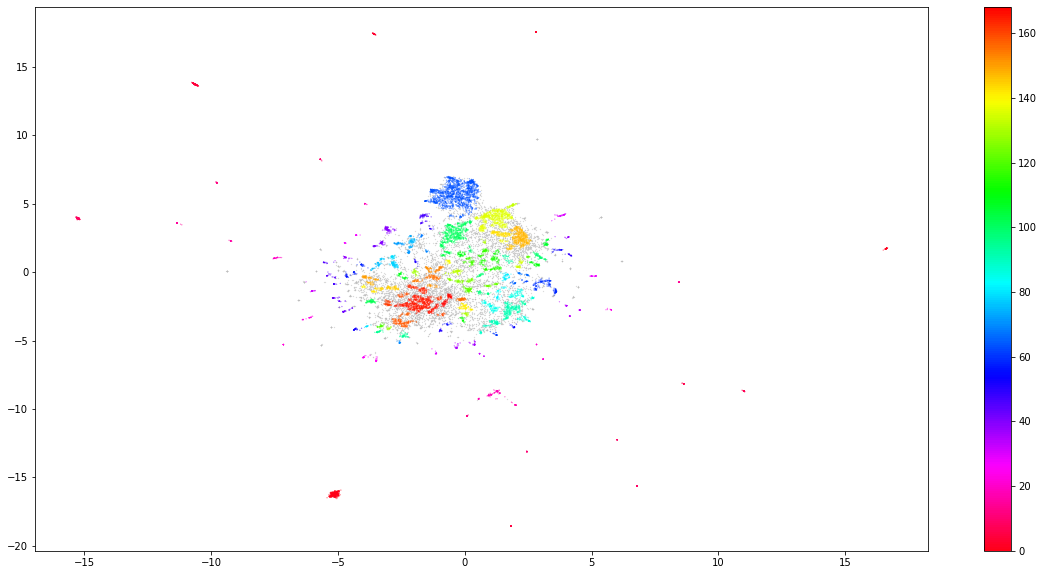

In [12]:
#umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
result = pd.DataFrame(umap_embeddings, columns=['x','y'])
result['labels'] = cluster.labels_

fig, ax = plt.subplots(figsize=(20,10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]

plt.scatter(outliers.x, outliers.y, color = '#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

In [13]:
docs_df = pd.DataFrame(data, columns=["Doc"])
docs_df['Topic'] = cluster.labels_
docs_df['Doc_ID'] = range(len(docs_df))
docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})

In [14]:
docs_per_topic

,Topic,Doc
0,-1,Scripts.com American Sniper By Jason Hall M...
1,0,Page / Page / Page / Page / Page / Page / Page...
2,1,DRAX ( Dave Bautista) DRAX ( Dave Bautista) ...
3,2,NEBULA (Karen Gillan) NEBULA (Karen Gillan) NE...
4,3,GAMORA (Zoe Saldana) GAMORA (Zoe Saldana) GAMO...
...,...,...
165,164,"Sheikh, look at me when 'm talking to you. He..."
166,165,"You got a gift. 'll wear it, in the mood. ..."
167,166,Country's countrywide. It's all part of the...
168,167,you had to do that. Heh. ...until we find the...


In [15]:
def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count

In [16]:
tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(data))

/var/folders/sx/mxg316554p53ftfz37jrsvnr0000gn/T/ipykernel_89598/3267578824.py:5: RuntimeWarning: invalid value encountered in true_divide
  tf = np.divide(t.T, w)


In [17]:
def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names_out()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic'])
                     .Doc
                     .count()
                     .reset_index()
                     .rename({"Topic": "Topic", "Doc": "Size"}, axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
topic_sizes = extract_topic_sizes(docs_df); topic_sizes.head(10)

,Topic,Size
0,-1,5582
64,63,1453
137,136,621
102,101,598
166,165,592
148,147,466
1,0,369
92,91,278
5,4,181
159,158,179


In [18]:
len(top_n_words)

170

In [19]:
index = [63,136,101,165,147,0,91,4]

In [20]:
for i in index:
    print("Topic #", i-1)
    print(top_n_words[i][:7])
    print()

Topic # 62
[('don', 0.299998097097592), ('know', 0.11604926294868256), ('didn', 0.09123846239794076), ('doesn', 0.057310816088028224), ('just', 0.049424573516913754), ('won', 0.04534271548087778), ('want', 0.04199521446559447)]

Topic # 135
[('bad', 0.08420315753924172), ('wrong', 0.07147402302882154), ('maleficent', 0.0604487535922842), ('hate', 0.05344016919069316), ('enemy', 0.050011587096236675), ('terrible', 0.04693228001982482), ('mistake', 0.04173770605567418)]

Topic # 100
[('stop', 0.32306670869522003), ('let', 0.13920344714698887), ('gone', 0.11175603081151379), ('away', 0.09718206380678857), ('leave', 0.08581071423404087), ('way', 0.07268826499687171), ('black', 0.07257340156516148)]

Topic # 164
[('got', 0.10532404734432385), ('ve', 0.10422719473795315), ('ll', 0.07793272184314935), ('like', 0.07469666447596104), ('did', 0.07313281696559286), ('promise', 0.064816436113179), ('gonna', 0.055169739085122016)]

Topic # 146
[('kill', 0.0536108846757382), ('gonna', 0.044751834539